# Bước 0: Tổng quan dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/huongd17at089/income_prediction/master/data_adult.csv"


In [3]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,1,1,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,2,2,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,3,3,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,4,4,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,5,5,34,Private,10th,6,Never-married,White,Male,30,<=50K


In [ ]:
df.tail()

,Unnamed: 0,X,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
46028,46029,46029,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46029,46030,46030,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K
46030,46031,46031,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K
46031,46032,46032,22,Private,HS-grad,9,Never-married,White,Male,20,<=50K
46032,46033,46033,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,White,Female,40,>50K


In [4]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)



*   4603 bản ghi với 2 nhãn <=50k và >50k

*   Unnamed: 0 : không có ý nghĩa => drop
*   X : index??id?? => drop



In [6]:
df = df.drop(["X", "Unnamed: 0"], axis=1)


In [ ]:
# continuous_vars = df.select_dtypes(include="int64").columns
# categorical_vars = df.select_dtypes(include="object").columns
# target = "income"

In [ ]:
# kiểm tra missing value và duplicate record
print("duplicate : ",any(df.duplicated().tolist()))
df.isnull().sum()

duplicate :  True


age                0
workclass          0
education          0
educational.num    0
marital.status     0
race               0
gender             0
hours.per.week     0
income             0
dtype: int64

In [ ]:
df.iloc[df.duplicated().tolist()]

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
88,20,Private,HS-grad,9,Never-married,White,Male,40,<=50K
118,28,Private,HS-grad,9,Never-married,White,Male,40,<=50K
170,34,Private,Masters,14,Never-married,White,Male,40,<=50K
212,41,Private,Some-college,10,Married-civ-spouse,White,Male,40,<=50K
247,26,Private,Bachelors,13,Never-married,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
46022,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,White,Male,50,<=50K
46026,53,Private,Masters,14,Married-civ-spouse,White,Male,40,>50K
46027,22,Private,Some-college,10,Never-married,White,Male,40,<=50K
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,>50K




*   không có giá trị nan
*   duplicate ~ 2k (~40%) sample ở cả 2 nhãn => drop



In [12]:
df = df.drop_duplicates()

In [ ]:
df

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,10th,6,Never-married,White,Male,30,<=50K
...,...,...,...,...,...,...,...,...,...
46024,43,Private,Assoc-voc,11,Married-civ-spouse,White,Male,45,<=50K
46025,32,Private,Masters,14,Never-married,Asian-Pac-Islander,Male,11,<=50K
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,<=50K
46030,58,Private,HS-grad,9,Widowed,White,Female,40,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.2+ MB




*   Biến continuous : 

> age 

> educational.num 

> hours.per.week

*   Biến categorycal :


> workclass

> education

> race

> gender

> marital.status



*   binary target : 


> income


















In [9]:
continuous_vars = ["age", "educational.num", "hours.per.week"]
categorical_vars = ["workclass", "education", "marital.status", "race", "gender"]
target = "income"

# Bước 1 : Kiểm tra biến continuous

In [13]:
df1 = df[continuous_vars]
df1.sample(5)

,age,educational.num,hours.per.week
32431,40,9,45
3731,51,13,50
4053,37,14,50
22044,39,15,60
11138,38,14,20


In [14]:
df1.describe()

,age,educational.num,hours.per.week
count,26924.000000,26924.000000,26924.000000
mean,41.062546,10.198262,41.518905
std,13.626968,2.874213,14.034889
min,17.000000,1.000000,1.000000
25%,31.000000,9.000000,36.000000
50%,40.000000,10.000000,40.000000
75%,50.000000,13.000000,50.000000
max,90.000000,16.000000,99.000000


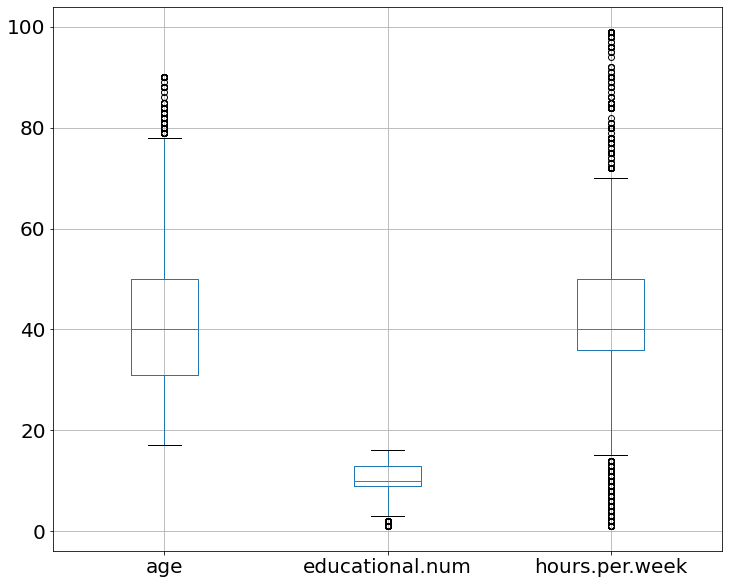

In [15]:
boxplot = df.boxplot(column=continuous_vars, figsize=(12, 10), fontsize=20)



> Age

*   tuổi trung bình ~ 40
*   đa phần < 50 tuổi
*   độ tuổi phổ biến : 30-50
*   miền phân bố : 17-90
*   có outlier > 70 ( độ tuổi lao động trung bình 18-65)

> Education.num

*   thời gian đào tạo trung bình ~ 10 năm ( đào tạo chuyên nghiệp )
*   thời gian đào tạo phổ biến : 8-13 năm ( phổ thông - chuyên nghiệp)
*   đa phần đào tạo < 13 năm
*   miền : 1-16 năm
*   outlier  < 4 ( mẫu giáo, tiểu học)

> Hours.per.week 

*   giờ làm việc trung bình ~40
*   số giờ làm việc phổ biến : 35-50
*   miền : 1-99
*   outlier : < 18 và  > 72 ( parttime ~20 overtime ~60)


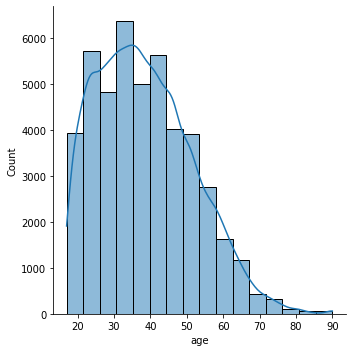

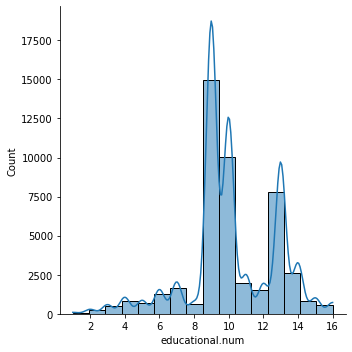

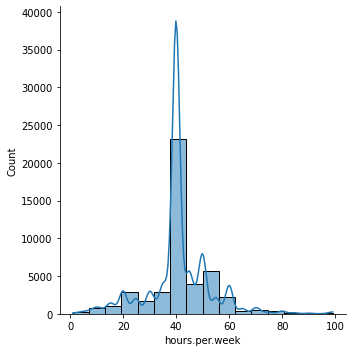

In [ ]:

# fig, axes = plt.subplots(1,ncols=n_col, figsize = (10, 10))
for ind,var in enumerate(continuous_vars):
  sns.displot(df1[var],kde = True, bins = 16)



*   hours per week phân bố khá cân : đa phần làm việc 40 tiếng
*   age phân bố lệch  : đa phần người trẻ tạo thu nhập
*   edu num : đa phần mọi ng được đào tạo nghề chuyên nghiệp




In [18]:
df1["target"] = df.income.apply(lambda x: x == ">50K").astype("int64")
df1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,educational.num,hours.per.week,target
age,1.000000,0.009197,0.005632,0.157533
educational.num,0.009197,1.000000,0.123633,0.322601
hours.per.week,0.005632,0.123633,1.000000,0.210662
target,0.157533,0.322601,0.210662,1.000000




*   Không có quan hệ rõ ràng nào




#Bước 2 : kiểm tra biến categorical

In [19]:
df2 = df[categorical_vars]
df2.sample(5)

,workclass,education,marital.status,race,gender
16198,Private,HS-grad,Never-married,White,Female
922,Self-emp-not-inc,Prof-school,Divorced,White,Male
209,Private,HS-grad,Never-married,White,Male
4842,Self-emp-not-inc,9th,Married-civ-spouse,White,Male
13943,Private,HS-grad,Never-married,White,Male


category từng biến



In [20]:
df2.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [21]:
df2.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [22]:
df2.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [23]:
df2.gender.unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df2["marital.status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [25]:
df2.describe(include=["O"])
# df.describe(include="all")

,workclass,education,marital.status,race,gender
count,26924,26924,26924,26924,26924
unique,7,16,7,5,2
top,Private,HS-grad,Married-civ-spouse,White,Male
freq,16664,6987,12135,21554,17221


<Figure size 432x288 with 0 Axes>

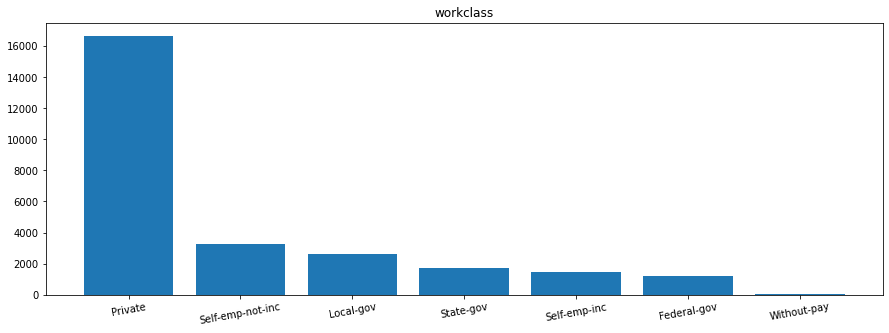

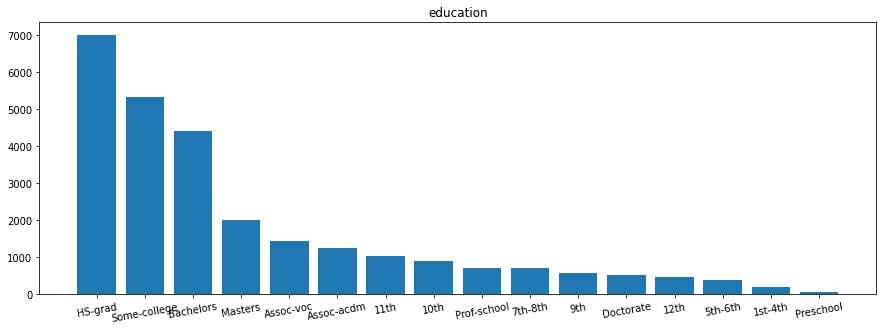

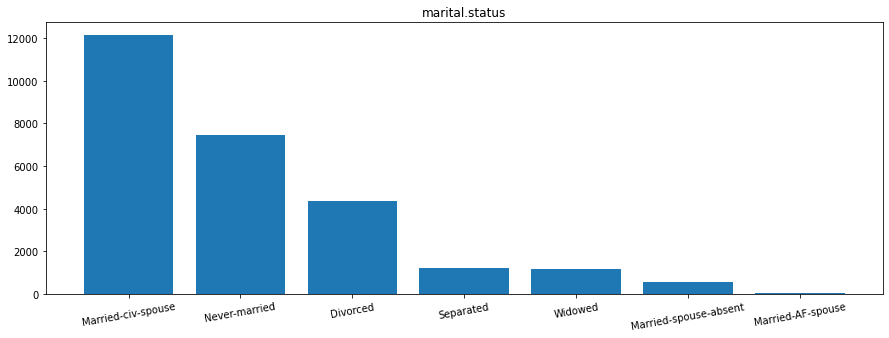

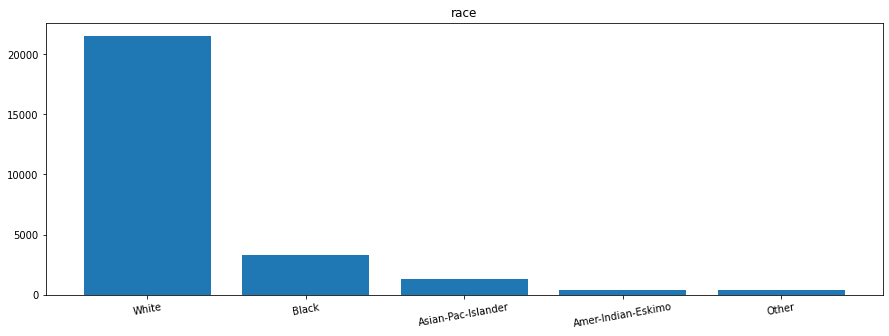

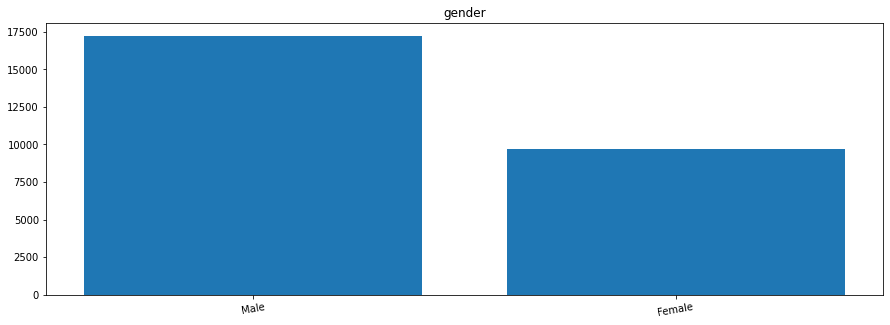

In [ ]:
from matplotlib import pyplot as plt
# fig,axes = plt.subplots(nrows=len(categorical_vars),figsize=(20,20))

for ind,var in enumerate(categorical_vars):
  frequency = df2[var].value_counts()
  # Percentage = Frequency/len(Frequency)*100
  plt.figure(ind)
  plt.figure(figsize=(15,5));
  plt.bar( frequency.index, frequency.values)
  plt.title(var)
  plt.xticks(rotation = 10)
#   axes[ind,0].set_title(var)
#   axes[ind,1].pie(x=Percentage, radius=1.5)
# plt.legend();


> race :
 * Đa phần mẫu ( 75% ) là white => mỹ, châu âu ?? ( trên 5 category )

> workclass : 
*   ~ 60% private ( trên 7 category)
*   private ?? 
*   withoutpay ~ 0









In [ ]:
df2.race.value_counts()

White                 21554
Black                  3335
Asian-Pac-Islander     1257
Amer-Indian-Eskimo      419
Other                   359
Name: race, dtype: int64

In [26]:
df2.workclass.value_counts()

Private             16664
Self-emp-not-inc     3263
Local-gov            2586
State-gov            1708
Self-emp-inc         1477
Federal-gov          1206
Without-pay            20
Name: workclass, dtype: int64

# Bước 3 + 4:  Feature engineering + Thống kê mô tả dữ liệu


In [28]:
df = pd.read_csv(url)
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.columns = ["age"	,"workclass"	,"education"	,"educational_num",	"marital_status",	"race",	"gender",	"hours_per_week",	"income"]
df = df.drop_duplicates().reindex()
df.sample(5)

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
10060,28,Private,Assoc-acdm,12,Never-married,Black,Female,38,<=50K
25260,36,Private,HS-grad,9,Married-civ-spouse,Black,Male,45,<=50K
9887,31,Self-emp-not-inc,10th,6,Married-civ-spouse,White,Male,55,>50K
24222,27,Private,Some-college,10,Never-married,White,Male,24,<=50K
43107,33,Private,HS-grad,9,Never-married,White,Male,70,<=50K




*   outliers : lớn tuổi làm việc nhiều




In [30]:
df.loc[(df.age >= 70) & (df.hours_per_week >= 70)]

,age,workclass,education,educational_num,marital_status,race,gender,hours_per_week,income
445,73,Self-emp-not-inc,Some-college,10,Widowed,White,Female,75,<=50K
2975,73,Self-emp-not-inc,HS-grad,9,Widowed,White,Male,77,<=50K
7912,90,Federal-gov,Masters,14,Divorced,White,Male,99,<=50K
8155,73,Self-emp-not-inc,7th-8th,4,Never-married,White,Female,99,<=50K
12168,72,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,White,Male,70,<=50K
13860,71,Self-emp-not-inc,11th,7,Married-civ-spouse,White,Male,75,>50K
14202,71,Self-emp-not-inc,Masters,14,Married-civ-spouse,White,Male,70,<=50K
17334,75,Private,10th,6,Widowed,White,Female,70,<=50K
17805,70,Private,Bachelors,13,Married-civ-spouse,White,Male,70,>50K
23504,70,Private,Some-college,10,Divorced,White,Male,80,<=50K




*   Lớn tuổi làm việc nhiều => thường là male và có thể thu nhập cao
*   female => thu nhập k cao



In [ ]:
# df.income = LabelEncoder().fit(["<=50K", ">50K"]).transform(df.income).astype("int64")

In [ ]:
# df_workclass_education = pd.crosstab(index=df.workclass, columns=df.education).reindex(columns=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
#                                       "10th", "11th", "12th", "HS-grad","Some-college",
#                                      "Assoc-voc", "Assoc-acdm", "Bachelors",
#                                      "Masters", "Prof-school","Doctorate"])
# df_workclass_education

education,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
workclass,,,,,,,,,,,,,,,,
Federal-gov,0,1,1,4,6,15,14,7,312,304,59,77,253,94,37,22
Local-gov,4,5,13,39,29,51,60,25,579,464,120,124,561,437,41,34
Private,58,174,319,487,453,694,829,370,4431,3228,954,809,2383,939,313,223
Self-emp-inc,0,2,8,20,13,27,23,12,361,287,58,55,345,102,111,53
Self-emp-not-inc,5,16,32,129,55,101,102,30,957,628,163,107,500,196,167,75
State-gov,1,2,4,16,10,18,15,11,334,397,71,62,370,239,45,113
Without-pay,0,0,0,2,0,0,0,0,13,3,0,2,0,0,0,0


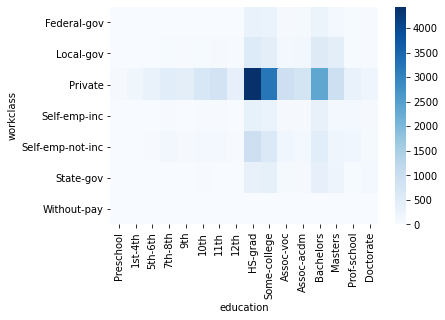

In [ ]:
# sns.heatmap(data=df_workclass_education, cmap = "Blues")

In [ ]:
df1 = df.copy()
df1 = pd.get_dummies(df, columns= ["income"])
pd.DataFrame(df1.groupby(by = ["education","workclass" ]).sum()[["income_<=50K", "income_>50K"]]).sort_values(by = "income_>50K", ascending=False)

,,income_<=50K,income_>50K
education,workclass,,
Bachelors,Private,1449.0,934.0
HS-grad,Private,3756.0,675.0
Some-college,Private,2575.0,653.0
Masters,Private,461.0,478.0
Assoc-voc,Private,713.0,241.0
Masters,Local-gov,223.0,214.0
Prof-school,Private,108.0,205.0
Assoc-acdm,Private,607.0,202.0
Bachelors,Self-emp-inc,145.0,200.0




*   Học vị cao thường có thu nhập cao hơn
*   Học vấn thấp thường có thu nhập không cao
=> phân nhóm
*   workclass không nói lên điều gì => không có ảnh hưởng lắm đến thu nhập



In [ ]:
pd.DataFrame(df1.groupby(by = ["marital_status","gender" ]).sum()[["income_<=50K", "income_>50K"]]).sort_values(by = "income_>50K", ascending=False)

income_<=50K  income_>50K
marital_status        gender                           
Married-civ-spouse    Male          5588.0       4689.0
                      Female         987.0        871.0
Never-married         Male          3697.0        415.0
Divorced              Male          1437.0        360.0
                      Female        2312.0        252.0
Never-married         Female        3096.0        241.0
Separated             Male           422.0         70.0
Widowed               Female         867.0         62.0
                      Male           184.0         58.0
Married-spouse-absent Male           252.0         38.0
Separated             Female         699.0         28.0
Married-spouse-absent Female         249.0         18.0
Married-AF-spouse     Female          11.0         10.0
                      Male             7.0          4.0



*   Nam giới thường có thu nhập cao hơn nữa giới
*   Độc thân và ly hôn thường có thu nhập không cao



In [ ]:
pd.DataFrame(df1.groupby(by = ["race"]).sum()[["income_<=50K", "income_>50K"]]).sort_values(by = "income_>50K", ascending=False)

,income_<=50K,income_>50K
race,,
White,15396.0,6158.0
Black,2847.0,488.0
Asian-Pac-Islander,887.0,370.0
Amer-Indian-Eskimo,366.0,53.0
Other,312.0,47.0




*   Vì phân bố quá lệch nên race k nói lên điều gì



In [ ]:
len(df.education.unique()), len(df.educational_num.unique())

(16, 16)

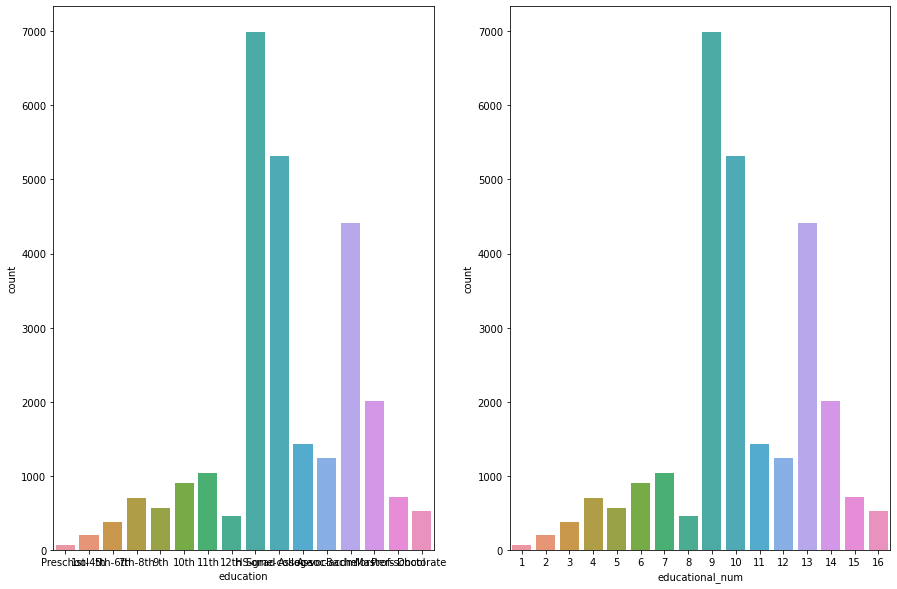

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (15, 10))
sns.countplot(data = df, x = "education", ax=axs[0], order=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
                                      "10th", "11th", "12th", "HS-grad","Some-college",
                                     "Assoc-voc", "Assoc-acdm", "Bachelors",
                                     "Masters", "Prof-school","Doctorate"])
sns.countplot(data = df, x = "educational_num", ax=axs[1])



*   education và education num có phân bố giống hệt nhau ( count ) = > 2 biến này giống hệt nhau => có thể drop 1 cái



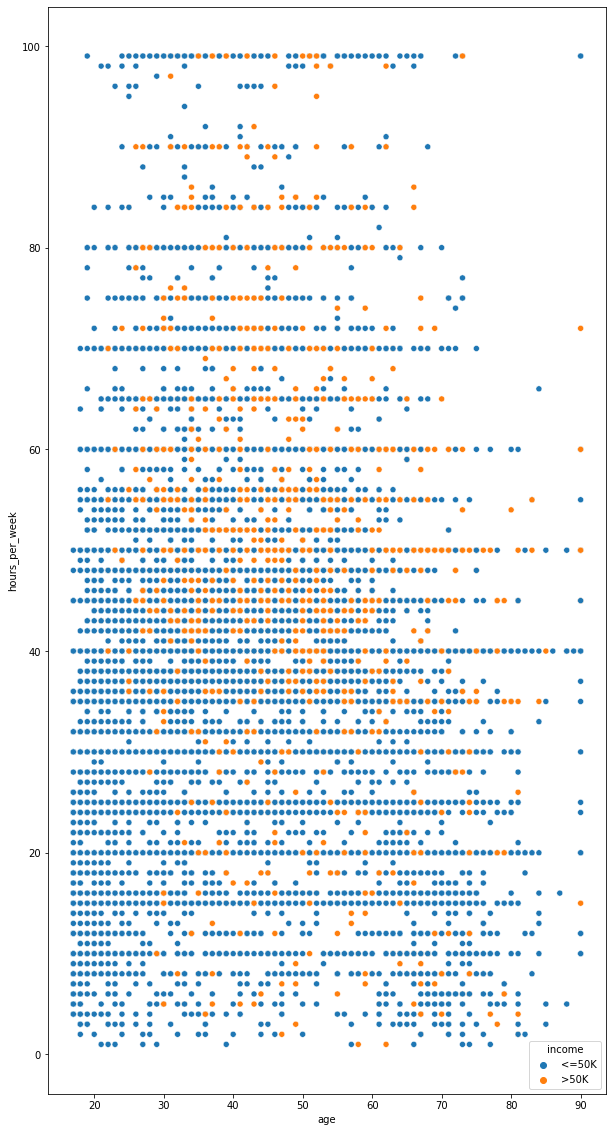

In [ ]:
plt.figure(figsize=(10,20))
sns.scatterplot(data = df, x = "age", y = "hours_per_week", hue = "income");



*   độ tuổi thu nhâp cao : 30 ~ 60
*   Thời gian làm việc thu nhập cao : 35 ~ 60



*   Độ tuổi lao động chia 2 nhóm chính : 20-45 và 46-65
*   thời gian làm việc : 15-25 ( part-time) 25-40(full-time) 40-60 ( over-time)

=>  binning



*   tạo thuộc tính mới = age* hours (30x35 ~ 60x60)
=>binning






feature selection 

In [ ]:
data = df.copy()

In [ ]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
# data = data.drop("education", axis=1)
data = data.drop("educational_num", axis=1)
data.education.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
                                      "10th", "11th", "12th"], "general", inplace = True)
data.education.replace([ "HS-grad", "Prof-school",
                                     "Assoc-acdm", "Assoc-voc", "Some-college"],"college", inplace = True)
data.education.replace([ "Bachelors", "Masters", "Doctorate"], "University", inplace = True)

In [ ]:
data.head()

,age,workclass,educational_num,marital_status,race,gender,hours_per_week,income
0,25,Private,7,Never-married,Black,Male,40,<=50K
1,38,Private,9,Married-civ-spouse,White,Male,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,White,Male,40,>50K
3,44,Private,10,Married-civ-spouse,Black,Male,40,>50K
4,34,Private,6,Never-married,White,Male,30,<=50K


In [ ]:
data.age = pd.cut(data.age, bins = [0,20,30, 60,100], labels = [0,1,2,3])
data.hours_per_week = pd.cut(data.hours_per_week, bins = [0,25,40,60, 100], labels = [0,1,2,3])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

# scaler = StandardScaler()
data[["educational_num" ]] = scaler.fit_transform(data[["educational_num"]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.income = le.fit(["<=50K", ">50K"]).transform(data.income)
data.gender = le.fit_transform(data.gender)
# data.education = le.fit(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th",
#                                       "10th", "11th", "12th", "HS-grad", "Prof-school",
#                                      "Assoc-acdm", "Assoc-voc", "Some-college", "Bachelors",
#                                      "Masters", "Doctorate"]).transform(data.education)
# data.education = le.fit(["general", "college", "University"]).transform(data.education)
data.education = le.fit_transform(data.education)
data.marital_status = le.fit_transform(data.marital_status)
data.race = le.fit_transform(data.race)
data.workclass = le.fit_transform(data.workclass)

In [ ]:
# data = pd.get_dummies(data, prefix= ["marital_status", "race", "workclass"],  columns = ["marital_status", "race", "workclass"], drop_first=True)

In [ ]:
data.astype("int64")

In [ ]:
Y = data.income
X = data.drop(labels= "income", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x_train, x_test, y_train , y_test = train_test_split(X, Y, test_size = 0.3)

model = RandomForestClassifier(200)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      5950
           1       0.61      0.55      0.58      2128

    accuracy                           0.79      8078
   macro avg       0.73      0.71      0.72      8078
weighted avg       0.78      0.79      0.78      8078



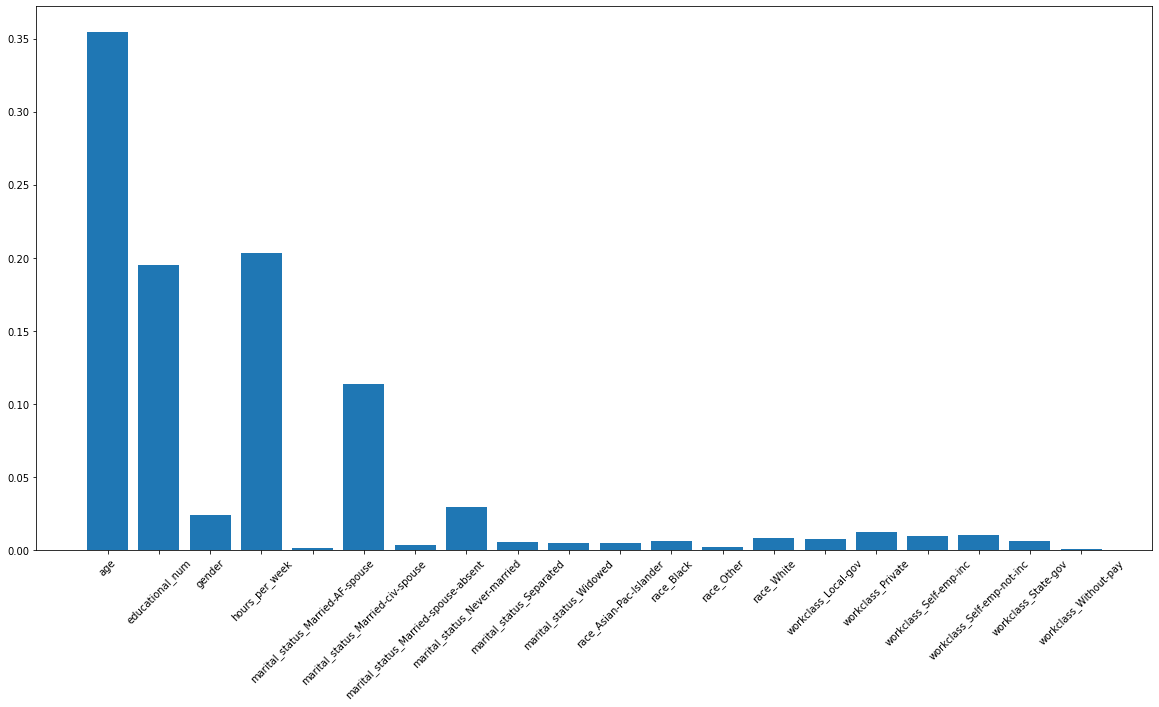

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(height= model.feature_importances_.tolist(), x = X.columns)
plt.xticks(rotation = 45);

In [ ]:
data_test = x_test
data_test = data_test.assign(true_label = y_test.values, predict_label = y_predict)
pd.set_option('display.max_rows', None)
data_test.loc[(data_test.true_label != data_test.predict_label)].astype("category").describe(include="all")

,age,educational_num,gender,hours_per_week,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,true_label,predict_label
count,2164.000000,2164.000000,2164,2164.000000,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164
unique,62.000000,16.000000,2,69.000000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
top,-0.151361,-0.416908,1,-0.108226,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
freq,74.000000,531.000000,1724,815.000000,2161,1601,2147,1909,2132,2126,2050,2013,2154,1873,1948,1266,2002,1865,2044,2164,1224,1224


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train , y_test = train_test_split(MinMaxScaler().fit_transform(X = X) , Y, test_size = 0.3)
svc = SVC()
svc.fit(x_train, y_train)

y_predict = svc.predict(x_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      5993
           1       0.60      0.29      0.39      2085

    accuracy                           0.77      8078
   macro avg       0.70      0.61      0.62      8078
weighted avg       0.74      0.77      0.74      8078



# Bước 5 + 6 :

In [ ]:
df = pd.read_csv(url)
df = df.drop(["X", "Unnamed: 0"], axis=1)
df.columns = ["age"	,"workclass"	,"education"	,"educational_num",	"marital_status",	"race",	"gender",	"hours_per_week",	"income"]
df = df.drop_duplicates().reindex()
df.sample()

In [ ]:
sns.countplot(x = "income", data = df);

**Nháp**

In [ ]:
data = df.copy()
data["income"].unique()


array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.loc[ data.income == ">50K", "income"] = 0
data.loc[ data.income == "<=50K", "income"] = 1
data

,age,workclass,education,educational.num,marital.status,race,gender,hours.per.week,income
0,25,Private,11th,7,Never-married,Black,Male,40,1
1,38,Private,HS-grad,9,Married-civ-spouse,White,Male,50,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,White,Male,40,0
3,44,Private,Some-college,10,Married-civ-spouse,Black,Male,40,0
4,34,Private,10th,6,Never-married,White,Male,30,1
...,...,...,...,...,...,...,...,...,...
46028,27,Private,Assoc-acdm,12,Married-civ-spouse,White,Female,38,1
46029,40,Private,HS-grad,9,Married-civ-spouse,White,Male,40,0
46030,58,Private,HS-grad,9,Widowed,White,Female,40,1
46031,22,Private,HS-grad,9,Never-married,White,Male,20,1


In [ ]:
data.income = data.income.astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   education        46033 non-null  object
 3   educational.num  46033 non-null  int64 
 4   marital.status   46033 non-null  object
 5   race             46033 non-null  object
 6   gender           46033 non-null  object
 7   hours.per.week   46033 non-null  int64 
 8   income           46033 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


In [ ]:
print(data.corr())

                      age  educational.num  hours.per.week    income
age              1.000000         0.037566        0.102185 -0.237338
educational.num  0.037566         1.000000        0.145151 -0.332293
hours.per.week   0.102185         0.145151        1.000000 -0.226795
income          -0.237338        -0.332293       -0.226795  1.000000


In [ ]:
from scipy import stats
import numpy as np

a = data.age.values
b = data.income.values

print(np.corrcoef(a, b))

[[1.         0.23733761]
 [0.23733761 1.        ]]
